In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import math

# HOMEWORK1

# Create a table show mean and standard deviation of ten portfolios

In [2]:
data = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
# data

In [4]:
column_means = data.mean()
column_stddevs = data.std()
summary_df = pd.DataFrame({"Mean":column_means,"Standard_deviation":column_stddevs})
summary_df

,Mean,Standard_deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


# Plot mimunim variance frontier (without the riskless asset) generated by the ten industry portfolios.

In [5]:
mean_array = np.array(summary_df["Mean"])
tran_mean = mean_array.T
cov = data.cov()
cov_array = np.array(cov)
inverse_cov = np.linalg.inv(cov_array)
identity_matrix = np.ones(10)
tran_identity = identity_matrix.T

In [6]:
zeta = tran_mean@inverse_cov@mean_array
alepha = tran_mean@inverse_cov@identity_matrix
delta = tran_identity@inverse_cov@identity_matrix
Rmv = alepha/delta

In [7]:
def variance_computing(item):
    return 1/delta+[delta/(zeta*delta-alepha*alepha)]*(item-Rmv)*(item-Rmv)

This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1%

In [8]:
rp = np.linspace(0,2)

In [9]:
result = variance_computing(rp)
sqrt_result = np.sqrt(result)

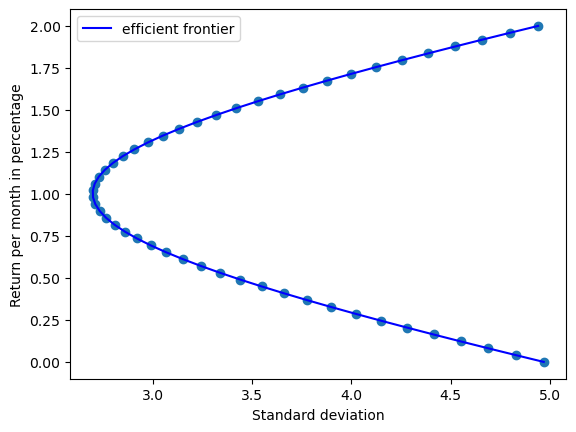

In [121]:
plt.scatter(sqrt_result,rp)
plt.plot(sqrt_result,rp,linestyle="-",color="blue",label="efficient frontier")
plt.xlabel("Standard deviation")
plt.ylabel("Return per month in percentage")
plt.legend()
plt.show()

# Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

In [11]:
rf = 0.13

In [12]:
def variance_computing1(item):
    return ((item - rf) * (item - rf)) / (zeta - 2 * alepha * rf + delta * rf * rf)

In [13]:
result1 = variance_computing1(rp)
sqrt_result1 = np.sqrt(result1)

Text(0, 0.5, 'rp in % return per month')

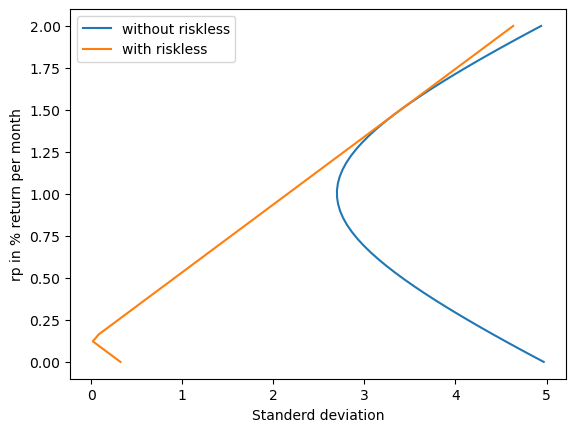

In [14]:
plt.plot(sqrt_result,rp,label="without riskless")
plt.plot(sqrt_result1,rp,label="with riskless")
plt.legend()
plt.xlabel("Standerd deviation")
plt.ylabel("rp in % return per month")

# Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [15]:
sharp_ratio = np.sqrt(zeta-2*alepha*rf+delta*rf*rf)
sharp_ratio

0.4035655993495088

In [16]:
rtg = (alepha*rf-zeta)/(delta*rf-alepha)

In [17]:
weight = (delta*rtg-alepha)/(zeta*delta-alepha**2)*inverse_cov@mean_array+(zeta-alepha*rtg)/(zeta*delta-alepha**2)*inverse_cov@identity_matrix

In [18]:
weight

array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
       -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])

In [19]:
df = pd.DataFrame(weight,index=data.columns)
df.rename(columns={"0":"Weight"})

,0
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


# HOMEWORK2

# Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

In [109]:
dataset=pd.read_excel('Market_Portfolio.xlsx',index_col="Date")
dataset#monthly return for market portfolio

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [21]:
alpha_beta_table=pd.DataFrame(columns=['Alpha','Beta'])
Rf=0.13
dataset['erm']=dataset['Market']-Rf
dataset

,Market,erm
Date,,
200401,2.22,2.09
200402,1.46,1.33
200403,-1.23,-1.36
200404,-1.75,-1.88
200405,1.23,1.10
...,...,...
201308,-2.69,-2.82
201309,3.76,3.63
201310,4.17,4.04


In [22]:
for x in data.columns:
    slope, intercept, r_value, p_value, std_err=linregress(dataset['erm'], data[x]-Rf)#对市场超额收益和组合超额收益进行regress
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[x] = row_data

In [23]:
alpha_beta_table

,Alpha,Beta
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


# alpha就是Intercept coefficient，beta就是slope coefficient

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. 

In [24]:
mean_monthly_return_industry=data.mean()
mean_monthly_return_industry

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [25]:
mean_monthly_return_market=dataset.mean()
mean_monthly_return_market

Market    0.748083
erm       0.618083
dtype: float64

In [26]:
mean_monthly_return_industry.loc['market']=mean_monthly_return_market[0]
mean_monthly_return_industry
#这一步的目的是把market return和industry return放在一起，后面的时候要注意分别

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\418903273.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_monthly_return_industry.loc['market']=mean_monthly_return_market[0]


NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
market    0.748083
dtype: float64

In [77]:
alpha_beta_table.loc['market']=[0.000000, 1.000000]
alpha_beta_table

,Alpha,Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


In [79]:
alpha_beta_table#在plot的时候连同market一同plot了

,Alpha,Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


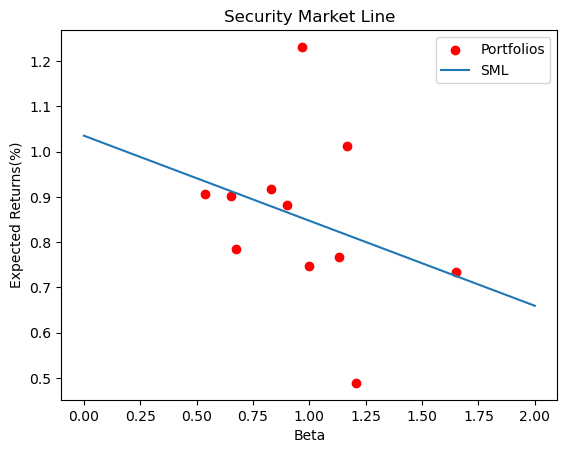

In [123]:
x=alpha_beta_table['Beta']
y=mean_monthly_return_industry
a,b=np.polyfit(x,y,1)
plt.scatter(x,y,label="Portfolios",color="r")
plt.plot([0,2],[b,a*2+b],label="SML")
plt.xlabel('Beta')
plt.ylabel('Expected Returns(%)')
plt.legend()
plt.title("Security Market Line")
plt.show()

# HOMEWORK3

# Using excess returns for the ten industry portfolios, calculate the following performance metrics:

Sharpe ratio
Sortino ratio (using risk-free rate as target)
Treynor ratio (using CAPM β)
Jensen's α
Three-factor α

In [111]:
data = pd.read_excel("Risk_Factors.xlsx",index_col = "Date")
portfolio = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [112]:
data

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [30]:
# data

In [31]:
Rf = data["Rf"]
Rf = pd.DataFrame(Rf)
Rf

,Rf
Date,
200401,0.07
200402,0.06
200403,0.09
200404,0.08
200405,0.06
...,...
201308,0.00
201309,0.00
201310,0.00


In [32]:
excess_return = portfolio-Rf.values
excess_return

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


# sharpe

In [33]:
sharpe = (excess_return.mean())/(excess_return.std())
sharpe_ratio = pd.DataFrame(sharpe,columns=["Sharpe_Ratio"])
sharpe_ratio

,Sharpe_Ratio
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948
Other,0.064693


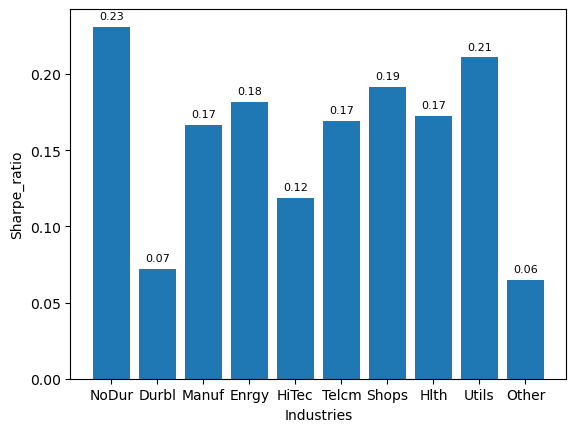

In [89]:
plt.bar(excess_return.columns,sharpe)
plt.xlabel("Industries")
plt.ylabel("Sharpe_ratio")
for i, v in enumerate(sharpe_ratio['Sharpe_Ratio'].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

# Treynor ratio

In [35]:
alpha_beta_table = pd.DataFrame(columns = ['Alpha', 'Beta'])

for i in portfolio.columns:
    slope, intercept, r_value, p_value, std_err = linregress(data['Rm-Rf'],
                                                             excess_return[i])#regress on market excess return and portfolio excess return
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[i] = row_data

alpha_beta_table

,Alpha,Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


In [36]:
treynor = (excess_return.mean())/alpha_beta_table["Beta"]
treynor_ratio = pd.DataFrame(treynor,columns=["Treynor_Ratio"])
treynor_ratio

,Treynor_Ratio
NoDur,1.186372
Durbl,0.367463
Manuf,0.758251
Enrgy,1.143330
HiTec,0.564295
Telcm,0.836363
Shops,0.951258
Hlth,0.971435
Utils,1.452334
Other,0.299781


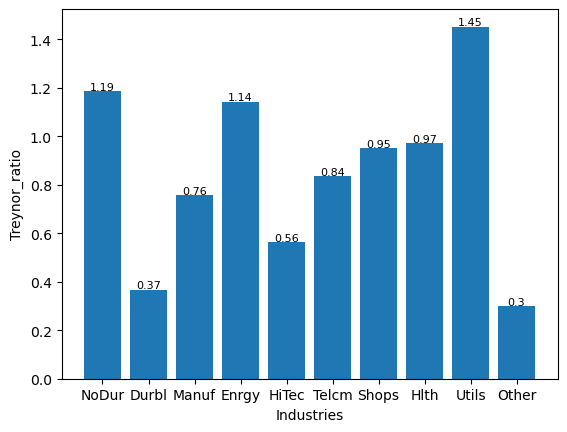

In [90]:
plt.bar(excess_return.columns,treynor)
plt.xlabel("Industries")
plt.ylabel("Treynor_ratio")
for i, v in enumerate(treynor_ratio['Treynor_Ratio'].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

# Sortino ratio

In [38]:
downside = excess_return.copy()#针对组合超额收益计算半方差
downside[downside>0] = 0
downside

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00
200402,0.00,-0.13,0.00,0.00,-2.98,-0.58,0.00,0.00,0.00,0.00
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.00,-4.05,0.00,-0.72
200404,0.00,0.00,-0.25,0.00,-4.99,-0.56,-2.78,0.00,-3.63,-3.84
200405,-1.95,-1.70,0.00,0.00,0.00,-3.01,0.00,-0.48,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
201310,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
downside_return = (downside*downside).mean()
sortino = (excess_return.mean())/(np.sqrt(downside_return))
sortino_ratio = pd.DataFrame(sortino,columns=["Sortino_Ratio"])
sortino_ratio

,Sortino_Ratio
NoDur,0.350804
Durbl,0.111967
Manuf,0.241260
Enrgy,0.273612
HiTec,0.170620
Telcm,0.244940
Shops,0.293032
Hlth,0.270294
Utils,0.290044
Other,0.087351


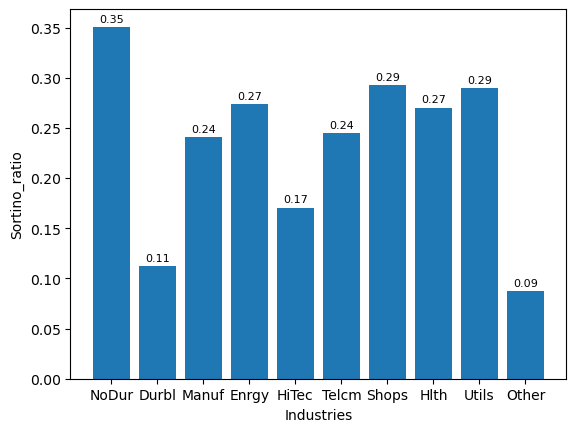

In [91]:
plt.bar(excess_return.columns,sortino)
plt.xlabel("Industries")
plt.ylabel("Sortino_ratio")
for i, v in enumerate(sortino_ratio['Sortino_Ratio'].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

In [41]:
jensen = (excess_return.mean())-alpha_beta_table["Beta"]*(data["Rm-Rf"].mean())
jensen_alpha = pd.DataFrame(jensen,columns=["Jensen's Alpha"])
jensen_alpha

,Jensen's Alpha
NoDur,0.369717
Durbl,-0.417903
Manuf,0.160494
Enrgy,0.504485
HiTec,-0.064024
Telcm,0.194348
Shops,0.274093
Hlth,0.236968
Utils,0.446523
Other,-0.387508


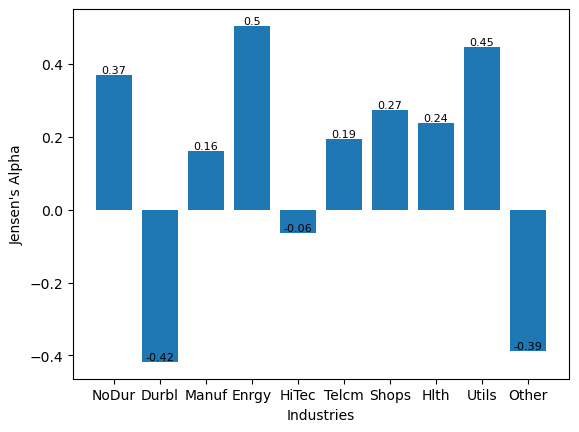

In [94]:
plt.bar(excess_return.columns,jensen)
plt.xlabel("Industries")
plt.ylabel("Jensen's Alpha")
for i, v in enumerate(jensen_alpha["Jensen's Alpha"].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

# Three factor alpha

In [43]:
X = data[["Rm-Rf","SMB","HML"]]
model = LinearRegression()
model.fit(X,excess_return)

LinearRegression()

In [44]:
intercept = model.intercept_
intercept

array([ 0.38670449, -0.47434183,  0.15328459,  0.52300699, -0.06597942,
        0.20072402,  0.25594107,  0.25747232,  0.47441058, -0.40441153])

In [45]:
tf_alpha = pd.DataFrame(intercept,index=excess_return.columns,columns=["Three-Factor α"])
tf_alpha

,Three-Factor α
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


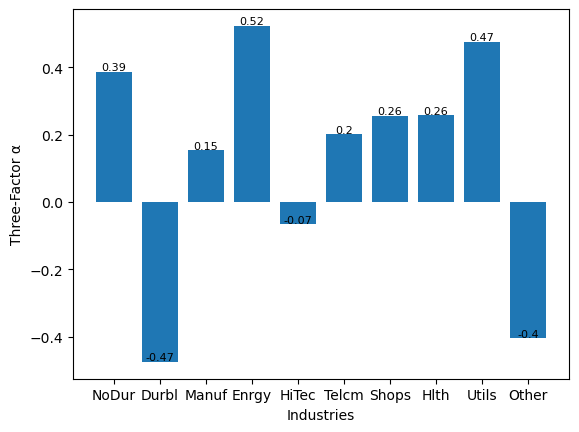

In [96]:
plt.bar(excess_return.columns,intercept)
plt.xlabel("Industries")
plt.ylabel("Three-Factor α")
for i, v in enumerate(tf_alpha['Three-Factor α'].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

# HOMEWORK4

Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

#### market return be target,Estimate the expected deviation from market return, for the ten industry portfolios:

In [99]:
portfolio = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")
market = pd.read_excel("Market_Portfolio.xlsx",index_col="Date")

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [102]:
a = portfolio-market.values
a# portfolio return-rf

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [106]:
#后续所有操作针对a就可以了

Same as above

# Information Ratio

In [47]:
information_ratio = linregress(sqrt_result1,rp)
information_ratio[0]
#注意，拟合的时候是针对考虑risk less asset的那个结果进行拟合，别搞错了

0.41416323873185945

# Minimum Variance Frontier

In [48]:
df = pd.DataFrame(columns=['mean', 'std_dev'],index=range(100000))
df

,mean,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [49]:
R = portfolio.mean()
V = portfolio.cov()

In [50]:
i = 0
for i in range(100000):
    w = np.random.uniform(0,1,10)# 10*1 vector range[0,1],先生成w
    weight = w/w.sum()#根据题目要求定义weight
    mean = weight@R
    variance = weight.T@V@weight
    std = np.sqrt(variance)
    df.iloc[i]=[mean,std]
    i +=1

In [51]:
df

,mean,std_dev
0,0.920945,4.307544
1,0.788384,4.227743
2,0.8274,4.148991
3,0.907808,4.175052
4,0.860197,4.431978
...,...,...
99995,0.838767,4.16571
99996,0.847743,4.221493
99997,0.84753,4.041272
99998,0.872333,4.221409


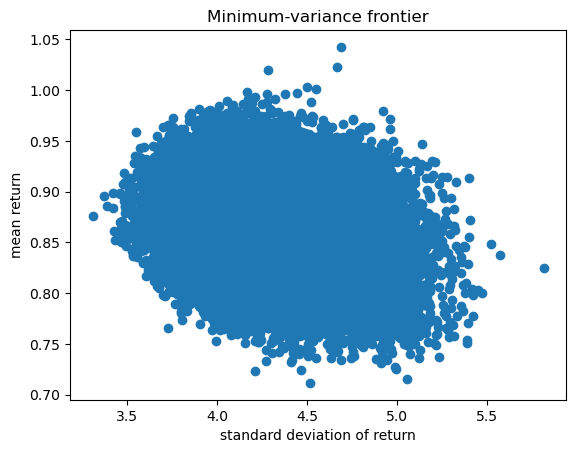

In [52]:
plt.scatter(df['std_dev'], df['mean'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.title('Minimum-variance frontier')
plt.show()

In [53]:
df_2 = pd.DataFrame(columns=['mean', 'std_dev'],index=range(100000))#repeat time
df_2

,mean,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [54]:
i = 0
for i in range(100000):
    inverse_w = np.random.uniform(0,1,10)
    w = 1/inverse_w
    weight = w/w.sum()
    mean = weight @ R
    variance = weight.T @ V @ weight
    std_dev = np.sqrt(variance)
    df_2.iloc[i]=[mean,std_dev]
    i +=1

In [55]:
df_2

,mean,std_dev
0,0.931564,4.78206
1,0.908581,3.813798
2,1.022343,4.430905
3,0.977333,4.386129
4,0.783702,4.549584
...,...,...
99995,0.903729,3.621096
99996,0.873942,3.811644
99997,0.888885,3.852924
99998,0.830264,4.215404


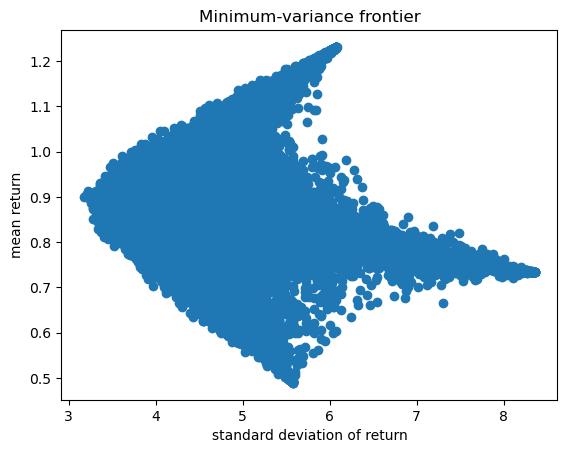

In [56]:
plt.scatter(df_2['std_dev'], df_2['mean'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.title('Minimum-variance frontier')
plt.show()

# HOMEWORK5

# Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

In [57]:
epsilion = np.random.randn(10**4)
epsilion

array([-1.05803598,  0.89556566,  0.93234802, ..., -0.66473058,
       -1.14466581,  0.44975179])

In [58]:
v = np.random.uniform(0,1,10**4)

In [59]:
threshold = 0.017
v[v<=threshold] = np.log(0.65)
v[v!=np.log(0.65)] = 0

In [60]:
lng = 0.02+0.02*epsilion+v
gama = np.arange(1,4.1,0.1)
gama

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. ])

In [61]:
start = 1
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp(lng)**-i
#分别计算在不同的gamma的值下对应的M的均值和方差

In [62]:
result_df = pd.DataFrame(columns=["γ", "μM", "σM"])
start = 1
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp(lng)**-i
    mean = np.mean(m)
    std = np.std(m)
    temp_df = pd.DataFrame({"γ": [i], "μM": [mean], "σM": [std]})
    result_df = pd.concat([result_df, temp_df], ignore_index=True)
result_df

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\973299416.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)


,γ,μM,σM
0,1.0,0.979586,0.070550
1,1.1,0.978798,0.079135
2,1.2,0.978062,0.088052
3,1.3,0.977381,0.097313
4,1.4,0.976756,0.106936
5,1.5,0.976189,0.116935
6,1.6,0.975683,0.127328
7,1.7,0.975240,0.138132
8,1.8,0.974862,0.149366
9,1.9,0.974551,0.161048


In [63]:
result_df["σM/μM"] = result_df["σM"]/result_df["μM"]
result_df

,γ,μM,σM,σM/μM
0,1.0,0.979586,0.070550,0.072020
1,1.1,0.978798,0.079135,0.080849
2,1.2,0.978062,0.088052,0.090027
3,1.3,0.977381,0.097313,0.099565
4,1.4,0.976756,0.106936,0.109481
5,1.5,0.976189,0.116935,0.119787
6,1.6,0.975683,0.127328,0.130502
7,1.7,0.975240,0.138132,0.141639
8,1.8,0.974862,0.149366,0.153218
9,1.9,0.974551,0.161048,0.165253


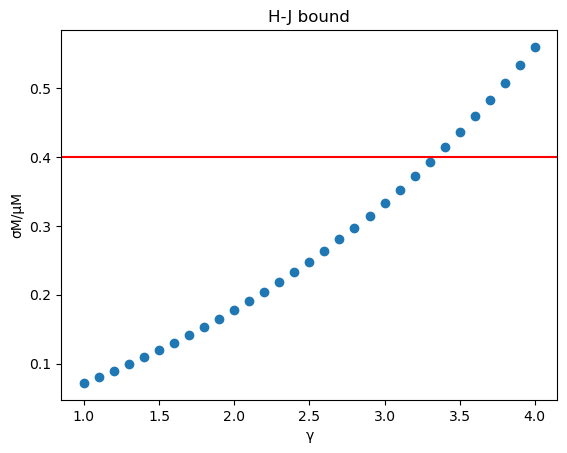

In [108]:
plt.scatter(gama,result_df["σM/μM"])
plt.axhline(y=0.4,color="r")#0.4是最大的sharp ratio
plt.ylabel("σM/μM")
plt.xlabel("γ")
plt.title("H-J bound")
plt.show()

# HOMEWORK6

# 计算equity premium，并plot against b0

In [65]:
#首先还是根据题目条件生成epsilon，并计算g
error = np.random.randn(10**4)
lng = 0.02+0.02*error
g = np.exp(lng)
g

array([1.0253596 , 1.02053407, 1.01648584, ..., 1.0224349 , 1.01281319,
       1.00433387])

In [66]:
#下面定义b0（也可能是别的根据题目要求）
b0 = np.arange(0,10.1,0.1)
b0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

因为在这个题目中，x是变量，v也是变量，所以我们要先定义函数，在进行循环

In [67]:
#定义函数
def v(x):
    v_list = []
    for i in g:
        if x*i>=1.0303:
            y = x*i-1.0303
        else:
            y = 2*(x*i-1.0303)
        v_list.append(y)
    return v_list

In [68]:
def e(x,b):
    output = 0.99*b*np.mean(v(x))+0.99*x-1
    return output

In [69]:
#确定x的范围
x_list = []
for b in b0:
    upper = 1.1
    lower = 1.0
    output = e((upper+lower)/2, b)
    while abs(output) > 1e-5:
        if output>0:
            upper=(lower+upper)/2
            output = e((lower+upper)/2,b)
        else:
            lower=(lower+upper)/2
            output = e((lower+upper)/2,b)
    x_list.append((upper+lower)/2)

In [70]:
x_array = np.array(x_list)
x_array

array([1.01010742, 1.01077881, 1.01130371, 1.01171875, 1.01206055,
       1.01234131, 1.01257324, 1.01278076, 1.01295166, 1.01311035,
       1.01324463, 1.0133667 , 1.01347656, 1.01357422, 1.01365967,
       1.01373901, 1.01381226, 1.01387939, 1.01394043, 1.01399841,
       1.01405029, 1.01409912, 1.01414795, 1.01419067, 1.01422729,
       1.01426392, 1.01430054, 1.01433411, 1.01436462, 1.01439514,
       1.01442261, 1.01445007, 1.01447449, 1.0144989 , 1.01452026,
       1.01454163, 1.01456299, 1.0145813 , 1.01460266, 1.01462097,
       1.01463623, 1.01465454, 1.0146698 , 1.01468506, 1.01470032,
       1.01471252, 1.01472778, 1.01473999, 1.0147522 , 1.0147644 ,
       1.01477661, 1.01478729, 1.01479797, 1.01480865, 1.01481934,
       1.01482849, 1.01483765, 1.01484833, 1.01485596, 1.01486511,
       1.01487427, 1.0148819 , 1.01488953, 1.01489868, 1.01490479,
       1.01491241, 1.01492004, 1.01492615, 1.01493378, 1.01493988,
       1.01494751, 1.01495361, 1.01495972, 1.01496429, 1.01497

In [114]:
#计算P/D ratio
pd_ratio = 1/(x_array-1)
pd_ratio

array([98.93719807, 92.77463194, 88.46652268, 85.33333333, 82.91497976,
       81.02868447, 79.53398058, 78.2425979 , 77.21017908, 76.27560521,
       75.50230415, 74.81278539, 74.20289855, 73.66906475, 73.20822163,
       72.7854287 , 72.39946973, 72.04925242, 71.73380035, 71.43666885,
       71.17289314, 70.92640693, 70.68162209, 70.4688172 , 70.28743029,
       70.10697475, 69.92744345, 69.76367894, 69.61546633, 69.46788213,
       69.33559035, 69.20380148, 69.08707569, 68.970743  , 68.8692728 ,
       68.76810073, 68.66722548, 68.58099623, 68.48066876, 68.39490712,
       68.323603  , 68.23823407, 68.16725608, 68.0964256 , 68.02574216,
       67.96930097, 67.89888106, 67.8426501 , 67.78651221, 67.73046714,
       67.67451466, 67.62563203, 67.57681996, 67.52807831, 67.47940692,
       67.43774439, 67.39613328, 67.34765183, 67.31306491, 67.27160747,
       67.23020107, 67.19573465, 67.16130355, 67.12003277, 67.09254709,
       67.05822163, 67.02393127, 66.99652423, 66.96229692, 66.93

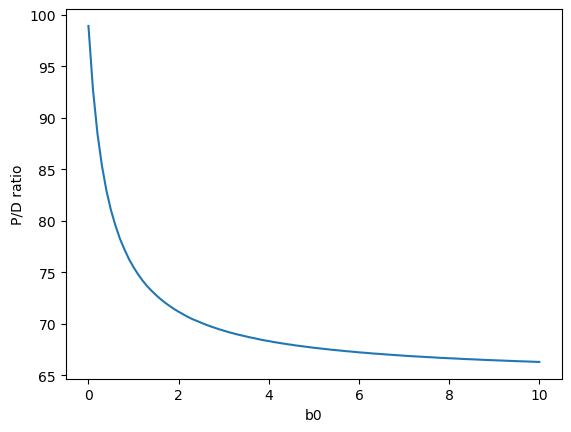

In [115]:
plt.plot(b0,pd_ratio)
plt.xlabel("b0")
plt.ylabel("P/D ratio")
plt.show()

In [73]:
rf=1.0303

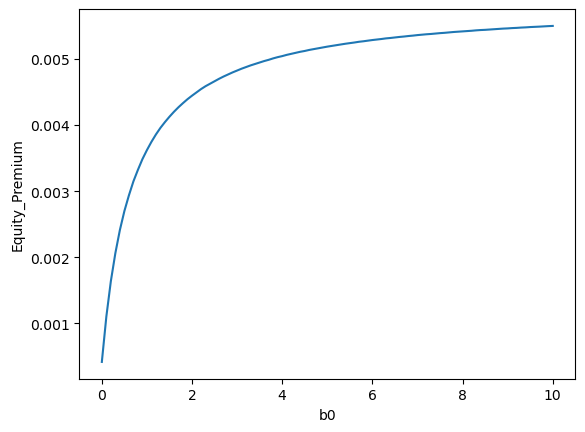

In [117]:
#计算equity premium并plot
equity_premium = x_array*math.exp(0.0202)
plt.plot(b0,equity_premium-rf)
plt.xlabel("b0")
plt.ylabel("Equity_Premium")
plt.show()
#一定要记住减Rf